In [1]:
# Tombo library
from tombo import tombo_helper, tombo_stats, resquiggle
# matplotlib library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
# py3helpers
from py3helpers.classification import ClassificationMetrics
from py3helpers.utils import merge_lists
from py3helpers.seq_tools import ReferenceHandler

# Other common libraries
import pandas as pd
from sklearn.utils import assert_all_finite
from scipy import signal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc

import numpy as np
# built in library
import os


In [19]:
rrna_16S_stats = "/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/16S_de_novo.tombo.stats"
save_fig_path = None
assert os.path.exists(rrna_16S_stats)
ts = tombo_stats.TomboStats(rrna_16S_stats)
for contig in ts:
    all_data = contig[4]
    position_fraction_modified = {x[2]: x[0] for x in all_data}
    break


In [33]:
from py3helpers.seq_tools import ReferenceHandler
from py3helpers.utils import merge_lists
ecoli = ReferenceHandler("/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/baseline_model/temp/J01859.1.fa")
# https://www.ncbi.nlm.nih.gov/nuccore/J01859
variations = [76, 80, 88, 89, 90, 92, 179, 182, 193, 194, 267, 272, 283, 285, 348, 630, 632, 640, 853, 915, 965, 1027, 1071, 1074, 1099, 1206, 1280, 1321, 1401, 1402, 1405, 1406, 1490, 1493, 1497, 1517, 1518]                
mods = [515, 526, 965, 966, 1206, 1401, 1406, 1497, 1515, 1517, 1518]
miss_pos = variations + mods
must_miss = merge_lists([list(range(x-20, x+20)) for x in miss_pos])
seq = ecoli.get_sequence("J01859.1", 0, 1518)
pos = []
min_gap = 18
wait = False
curr_gap = 0
for i, x in enumerate(seq):
    if wait:
        curr_gap += 1
        if curr_gap == min_gap:
            curr_gap = 0
            wait = False
    elif i > 200 and i not in must_miss and i < 1480 and position_fraction_modified[i] < .05:
        if x == "G":
            pos.append((i, x))
            wait = True

print(len(pos))
my_map = {"G": "GZ",
       "A": "AXY"}
with open("/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/baseline_model/temp/16S_final.positions", "a") as fh:
    for x in pos:
        print("\t".join(["J01859.1", str(x[0]), "+", x[1], my_map[x[1]]]), file=fh)


20


In [34]:
pos

[(228, 'G'),
 (389, 'G'),
 (411, 'G'),
 (440, 'G'),
 (482, 'G'),
 (548, 'G'),
 (568, 'G'),
 (595, 'G'),
 (703, 'G'),
 (723, 'G'),
 (743, 'G'),
 (771, 'G'),
 (798, 'G'),
 (830, 'G'),
 (939, 'G'),
 (1000, 'G'),
 (1129, 'G'),
 (1180, 'G'),
 (1359, 'G'),
 (1451, 'G')]

<IPython.core.display.Javascript object>


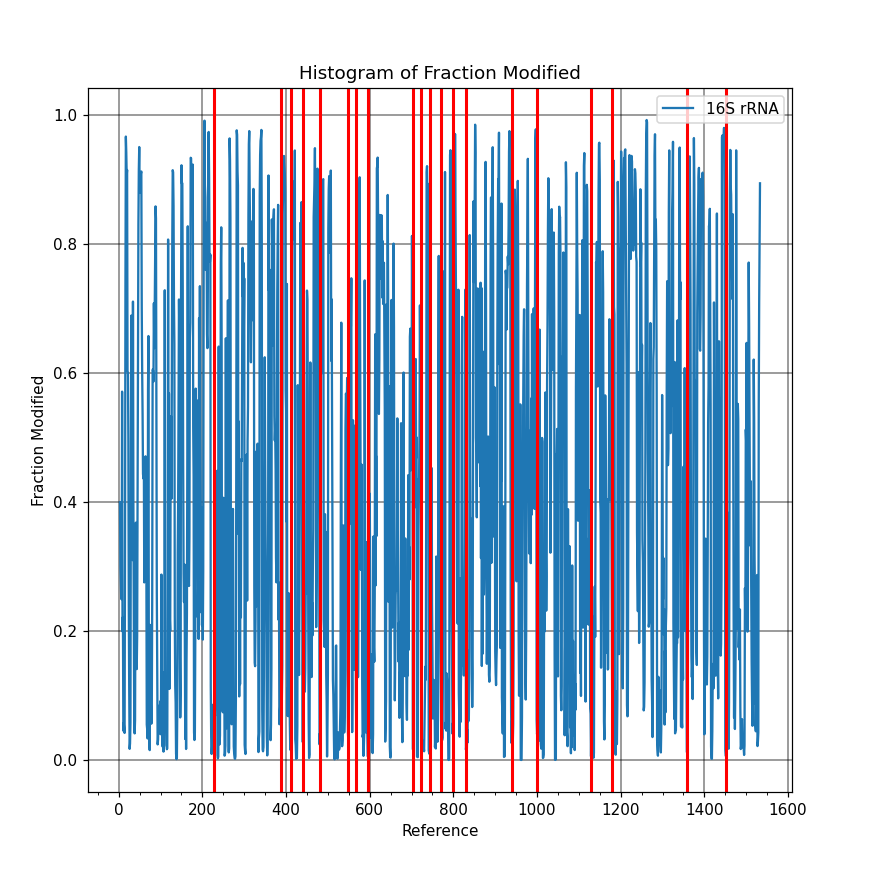

In [35]:
%matplotlib notebook

title = "Histogram of Fraction Modified"
y_label = "Reference"

fig = plt.figure(figsize=(8, 8))
panel1 = plt.axes([0.1, 0.1, .8, .8])
panel1.set_xlabel("Reference")
panel1.set_ylabel("Fraction Modified")
panel1.grid(color='black', linestyle='-', linewidth=1, alpha=0.5)

panel1.set_title(label=title)

assert os.path.exists(rrna_16S_stats)
ts = tombo_stats.TomboStats(rrna_16S_stats)
for contig in ts:
    all_data = contig[4]
    panel1.plot([x[2] for x in all_data], [x[0] for x in all_data], label="16S rRNA")

for p, base in pos:
    panel1.axvline(x=p, linewidth=2, color='r')
            
            
panel1.xaxis.set_major_locator(ticker.MultipleLocator(200))
panel1.xaxis.set_minor_locator(ticker.MultipleLocator(50))

panel1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

panel1.legend()

# option to save figure or just show it
if save_fig_path is not None:
    plt.savefig(save_fig_path)


In [46]:
from signalalign.hiddenMarkovModel import *
model = HmmModel(ont_model_file="/Users/andrewbailey/CLionProjects/signalAlign/models/testModelR9p4_5mer_acgt_RNA.model", hdp_model_file="/Users/andrewbailey/CLionProjects/signalAlign/models/template_RNA.singleLevelFixedCanonical.nhdp")
model2 = HmmModel(ont_model_file="/Users/andrewbailey/CLionProjects/signalAlign/models/testModelR9p4_5mer_acgt_RNA.model")
model2.convert_gaussian_to_hdp_model(20, 180, 2000)


In [54]:
model2.write_hdp_model("/Users/andrewbailey/CLionProjects/signalAlign/delete_me/test.normal_hdp")

'/Users/andrewbailey/CLionProjects/signalAlign/delete_me/test.normal_hdp'

In [55]:
kmer = "ATGCC"
event_mean = 92
print(model2.get_event_mean_gaussian_parameters(kmer))
print(model2.log_event_mean_gaussian_probability_match(event_mean, kmer))
print(np.log(model2.get_hdp_probability(kmer, event_mean)))
print(model2.get_hdp_probability(kmer, event_mean))

(92.468273, 3.049711)
-2.0457736567555607
-2.0457736538154365
0.12928013320939402


In [ ]:
model2# print(len(model.all_spline_slopes))
# print(len(set(model.dp_ids)))
# print(len(model.all_spline_slopes[0]))
print(len(model.data))
print(len(model.factor_lists))

In [ ]:
from scipy.stats import norm
import numpy as np
normal_mean, normal_sd = 10, 2

In [ ]:
linspace = np.linspace(0, 21, 2000)

In [ ]:
dx = linspace[1]-linspace[0]
y = norm.pdf(linspace, normal_mean, normal_sd)
print(np.gradient(y, dx))

In [62]:
from py3helpers.seq_tools import ReferenceHandler
from py3helpers.utils import merge_lists
ecoli = ReferenceHandler("/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/baseline_model/temp/J01859.1.fa")
# https://www.ncbi.nlm.nih.gov/nuccore/J01859
variations = [76, 80, 88, 89, 90, 92, 179, 182, 193, 194, 267, 272, 283, 285, 348, 630, 632, 640, 853, 915, 965, 1027, 1071, 1074, 1099, 1206, 1280, 1321, 1401, 1402, 1405, 1406, 1490, 1493, 1497, 1517, 1518]                
mods = [515, 526, 965, 966, 1206, 1401, 1406, 1497, 1515, 1517, 1518]
miss_pos = variations + mods
must_miss = merge_lists([list(range(x-20, x+20)) for x in miss_pos])
seq = ecoli.get_sequence("J01859.1", 0, 1518)
pos = []
min_gap = 18
wait = False
curr_gap = 0
for i, x in enumerate(seq):
   if wait:
       curr_gap += 1
       if curr_gap == min_gap:
           curr_gap = 0
           wait = False
   elif i > 200 and i not in must_miss and i < 1480:
       if x == "A":
           pos.append((i, x))
           wait = True
       if x == "G":
           pos.append((i, x))
           wait = True

print(len(pos))
my_map = {"G": "GZ",
        "A": "AXY"}
with open("/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/baseline_model/temp/16S_final.positions", "a") as fh:
   for x in pos:
       print("\t".join(["J01859.1", str(x[0]), "+", x[1], my_map[x[1]]]), file=fh)


39
